# <center> Week 10: EDA

### Problem Description

ABC Bank wants to sell its term deposit product to customers. Before launching the product, the bank aims to develop a model to understand whether a particular customer will buy their product or not, based on the customer's past interaction with the bank or other financial institutions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Check for missing values

In [6]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing Values:")
print(missing_values if not missing_values.empty else "No missing values")


Missing Values:
No missing values


## <center> Exploratory Data Analysis (EDA)

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

### 1. Age Distribution

Text(0.5, 1.0, 'Age Distribution')

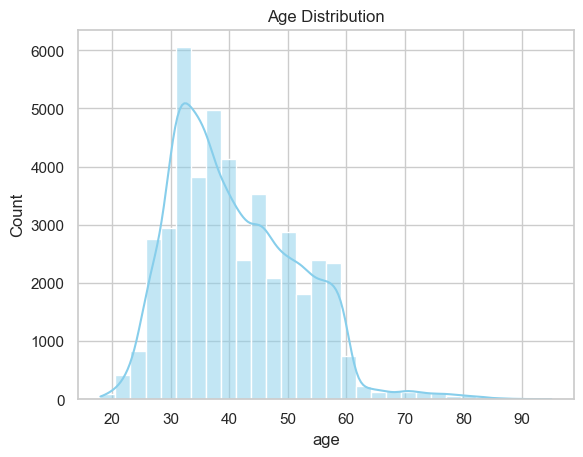

In [8]:
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")

#### Customers are mainly between 25 to 60 years old, a key demographic for term deposits

### 2. Job vs Subscription

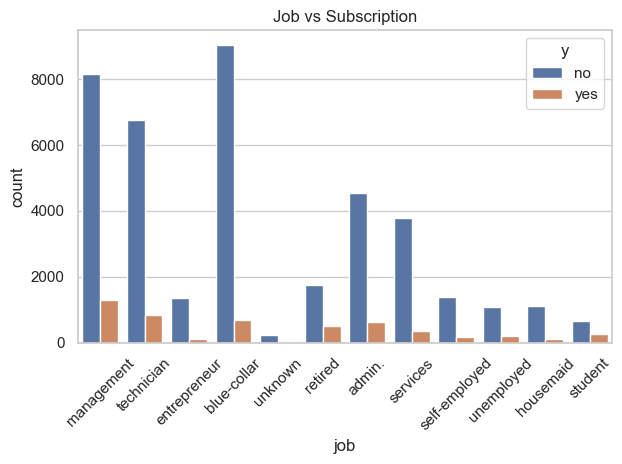

In [9]:
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title("Job vs Subscription")
plt.tight_layout()
plt.show()

#### Management and technician roles show higher subscription rates.

## 3. Education vs Subscription

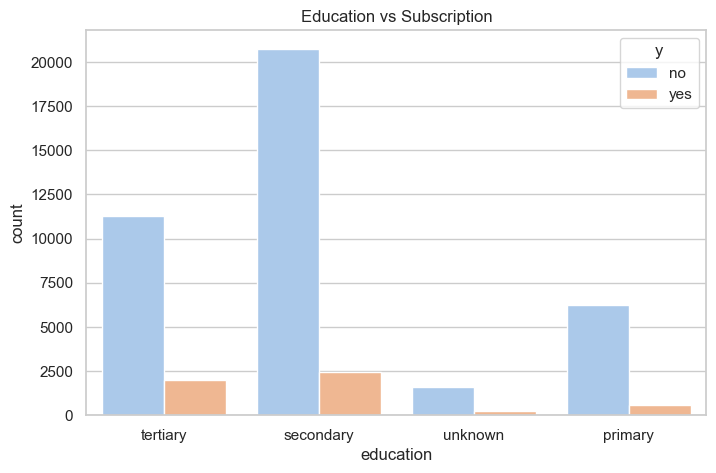

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education', hue='y', palette='pastel')
plt.title("Education vs Subscription")
plt.show()

#### Tertiary educated customers are more likely to subscribe.

## 4. Marital Status vs Subscription

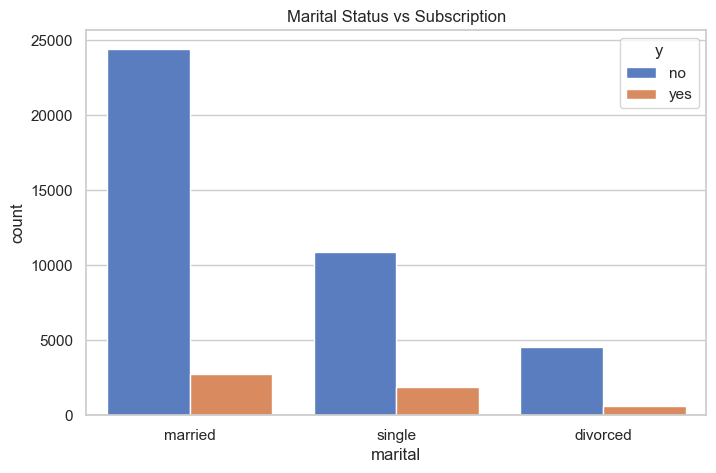

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='marital', hue='y', palette='muted')
plt.title("Marital Status vs Subscription")
plt.show()

#### Single customers tend to have higher subscription rates than married/divorced

## 5. Housing Loan Status

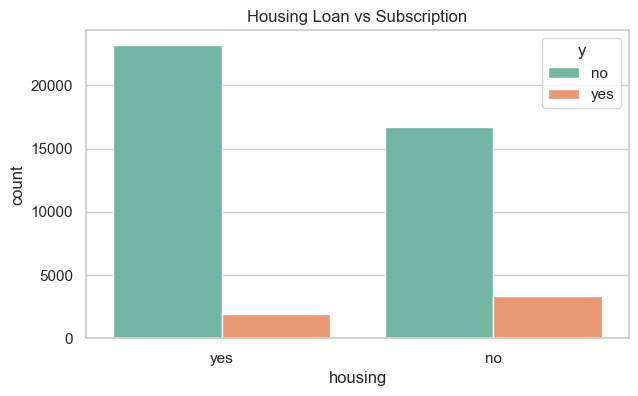

In [12]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='housing', hue='y', palette='Set2')
plt.title("Housing Loan vs Subscription")
plt.show()

#### Customers without housing loans appear slightly more likely to subscribe

## 6. Personal Loan Status

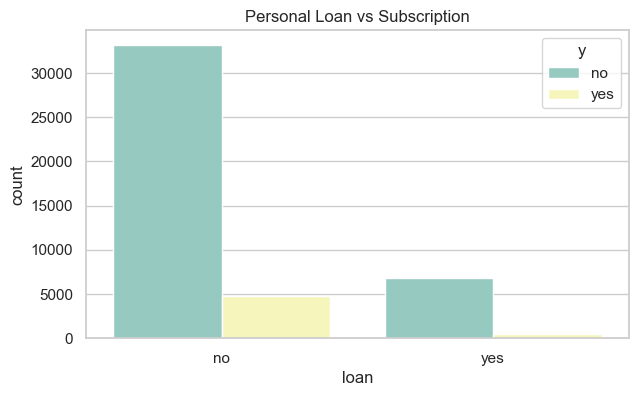

In [13]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='loan', hue='y', palette='Set3')
plt.title("Personal Loan vs Subscription")
plt.show()

#### Those without personal loans show better subscription interest

## 7. Balance Distribution (Zoomed In)

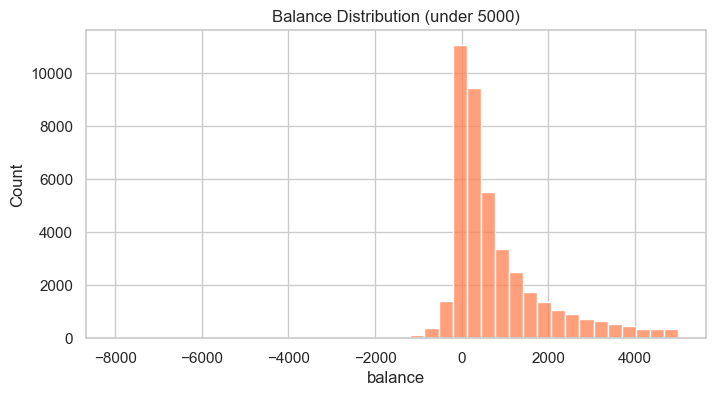

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(df[df['balance'] < 5000]['balance'], bins=40, color='coral')
plt.title("Balance Distribution (under 5000)")
plt.show()

#### Most customers have balances under 5000, indicating a middle-income audience

## 8. Contact Method vs Subscription

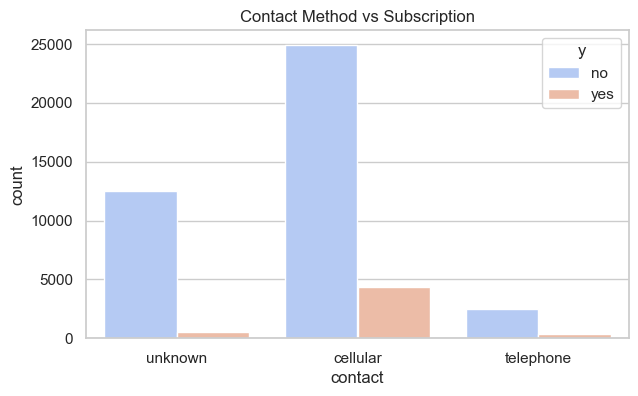

In [15]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='contact', hue='y', palette='coolwarm')
plt.title("Contact Method vs Subscription")
plt.show()

#### Customers contacted via cellular show better subscription rates

## 9. Previous outcome vs Subscription

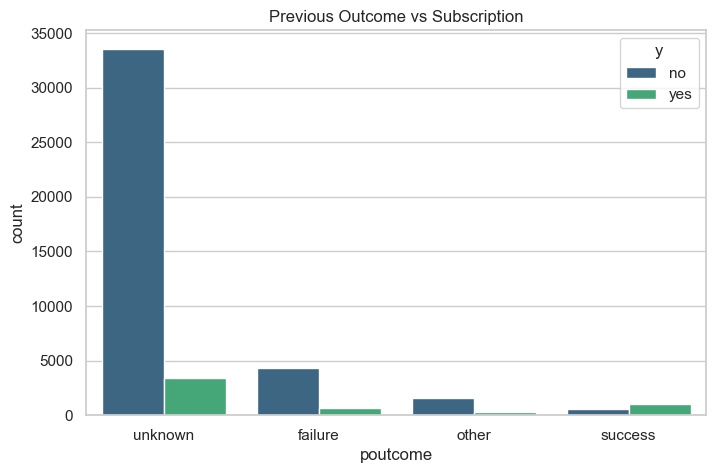

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='poutcome', hue='y', palette='viridis')
plt.title("Previous Outcome vs Subscription")
plt.show()

#### Successful outcomes in prior campaigns drastically improve subscription chances

## 10. Duration vs Subscription

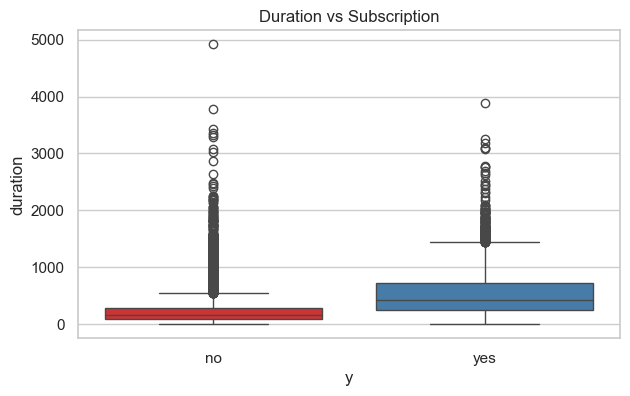

In [17]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='y', y='duration', palette='Set1')
plt.title("Duration vs Subscription")
plt.show()

#### Longer call durations often lead to a 'yes' decision — indicating interest builds over time.

### Pair Plot (Scatter Matrix)

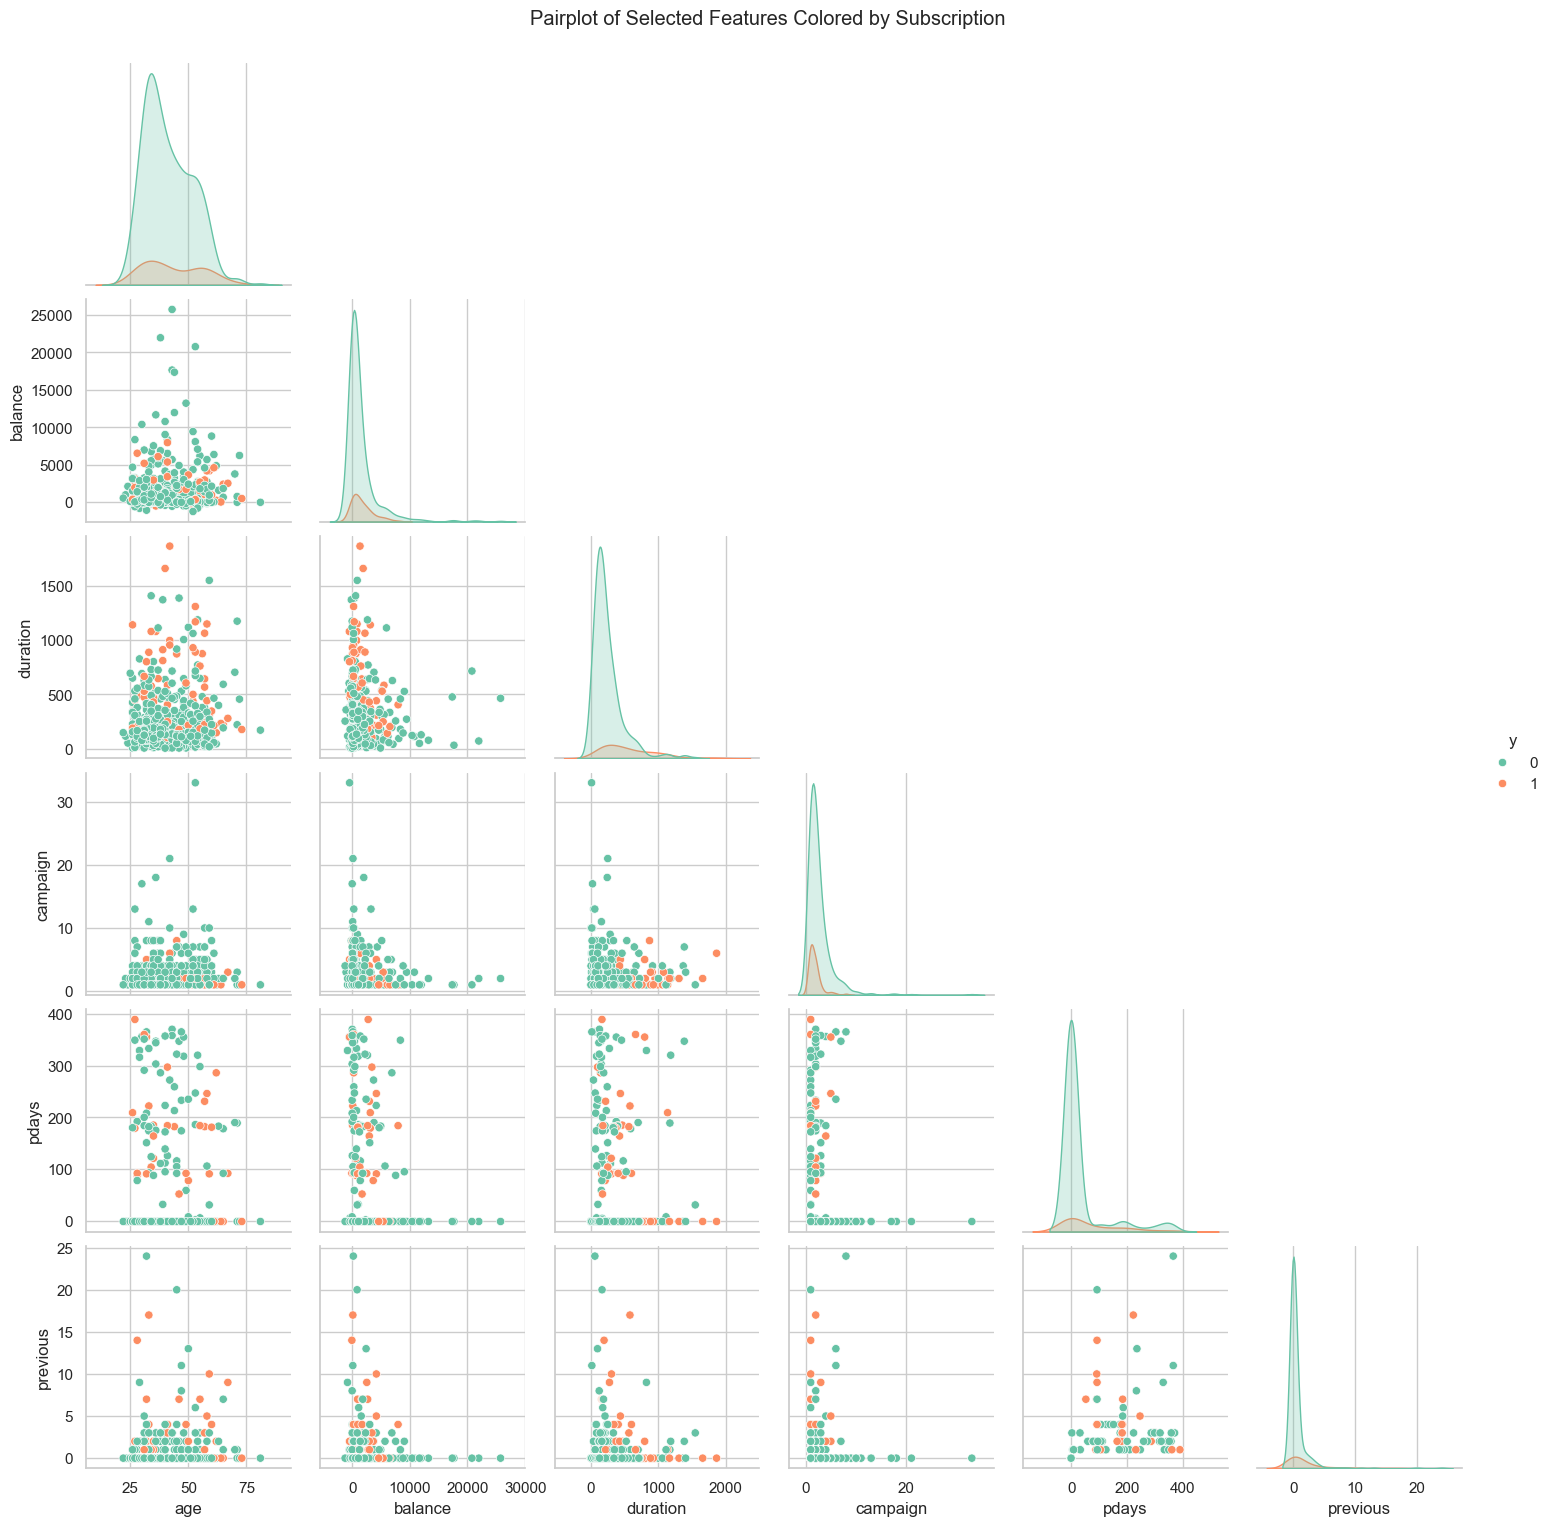

In [18]:
selected_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y']
df_pairplot = df[selected_features].copy()
df_pairplot['y'] = df_pairplot['y'].map({'yes': 1, 'no': 0})

sns.pairplot(df_pairplot.sample(500), hue='y', palette='Set2', corner=True)
plt.suptitle("Pairplot of Selected Features Colored by Subscription", y=1.02)
plt.show()


### 📊 Key Observations:

* duration forms distinct clusters for subscribed (yes) vs not (no) customers.

* Subscribed customers tend to lie in higher ranges of duration and sometimes higher balances.

* No strong linear patterns between other variables and y.

### Conclusions 

* Customers in management/technician roles or with tertiary education are more likely to subscribe.

* A longer call duration often correlates with a successful subscription.

* Previous campaign outcomes (poutcome) significantly impact current decisions.